In [1]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
from scipy.special import jn_zeros
from floquet_simulations.hamiltonians import ConvertComplex
PlotParams(fontsize=9)

In [2]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"Heff_omega={omega0},alpha={alpha},beta={beta}.csv"
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex
                   }
                  )
df["phi3/pi"]= np.round(df["phi3/pi"], 2)
df["xi"] =  np.angle(df["FT-J23"].to_numpy()*df["FT-J12"].to_numpy()*df["FT-J31"].to_numpy())
varphi =  np.array(df["phi3/pi"].to_list())
varphi_newmod = np.where(varphi > 1, varphi-2, varphi)
df.loc[:, "varphi_frac"] = varphi_newmod



In [42]:
np.arange

/tmp/ipykernel_185/3183998867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP.loc[:, "varphi_frac"] = varphi_newmod


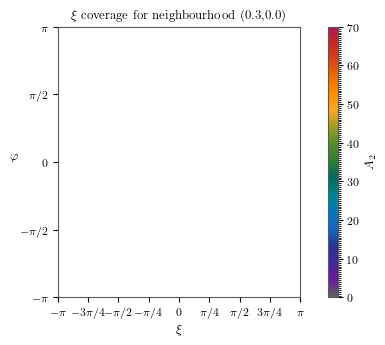

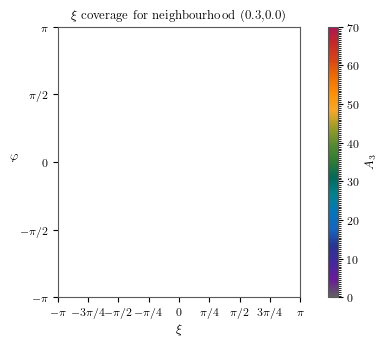

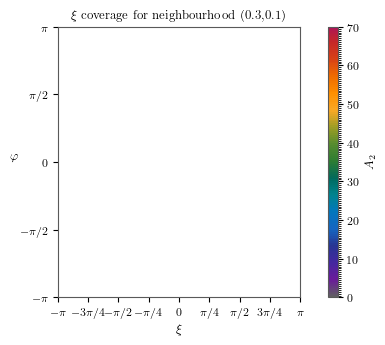

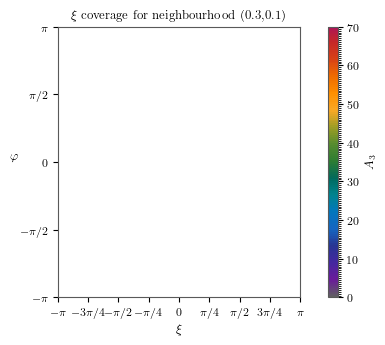

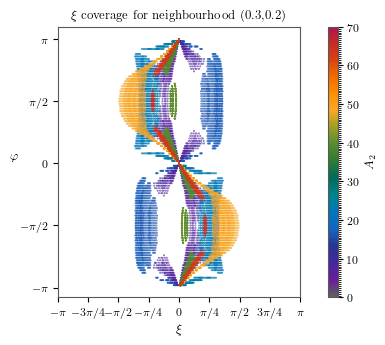

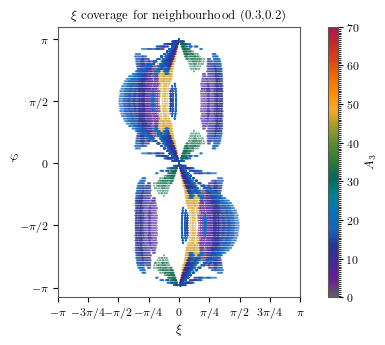

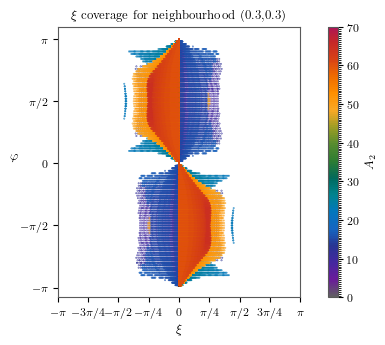

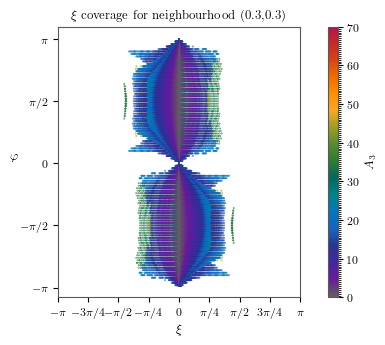

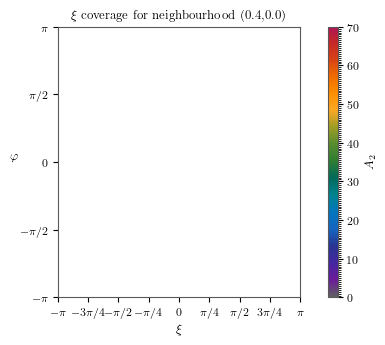

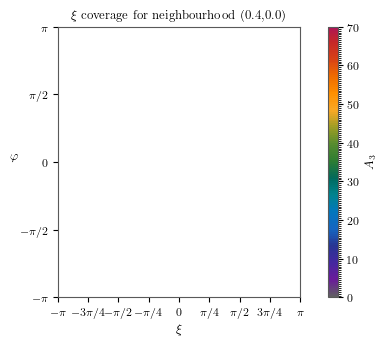

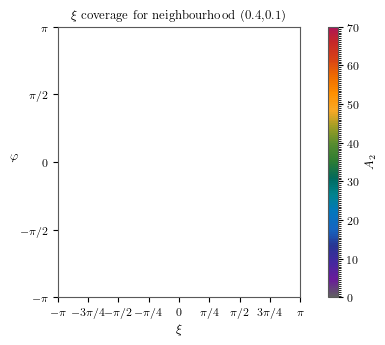

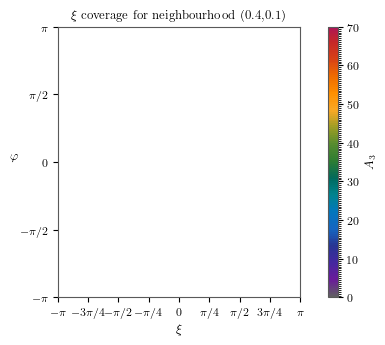

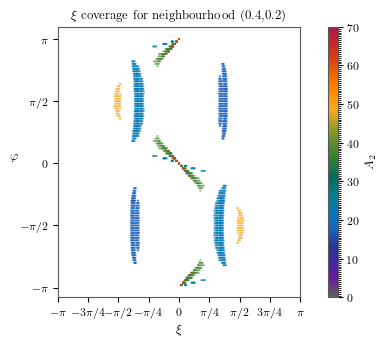

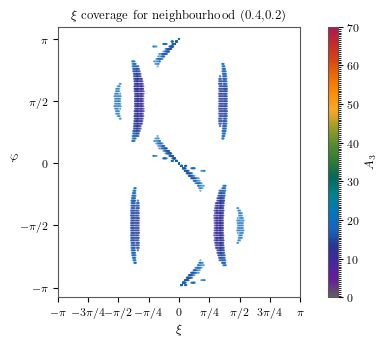

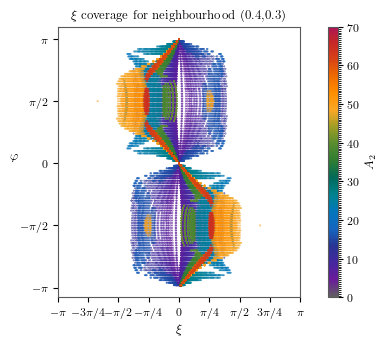

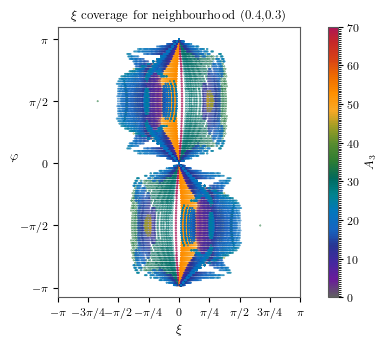

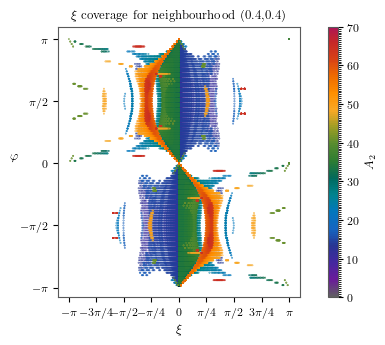

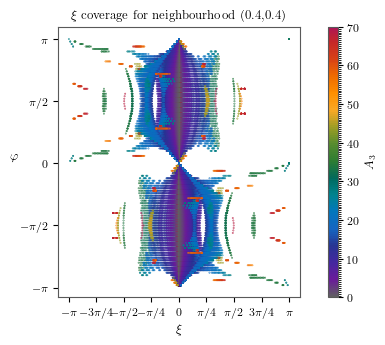

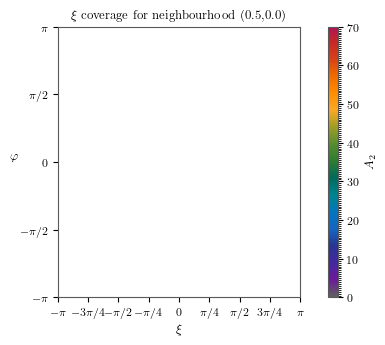

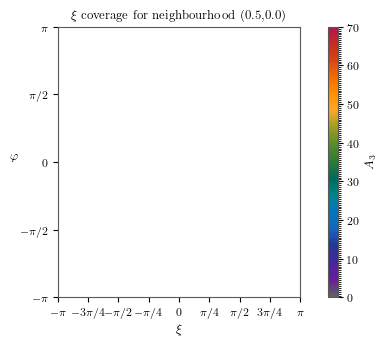

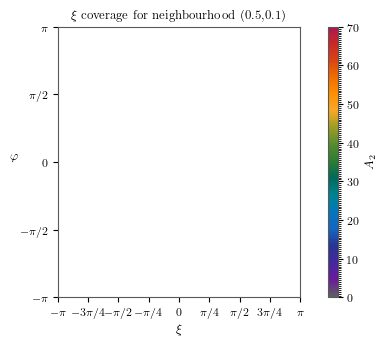

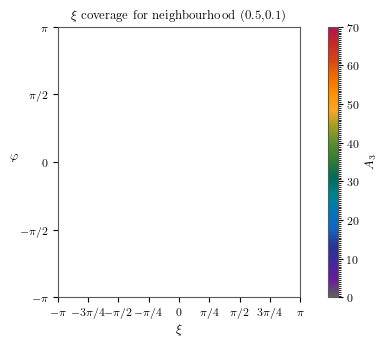

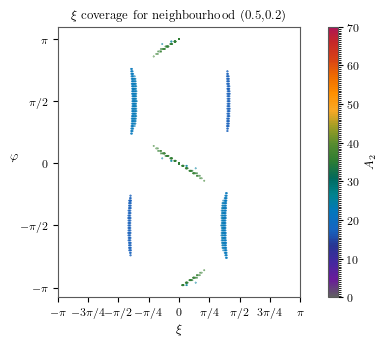

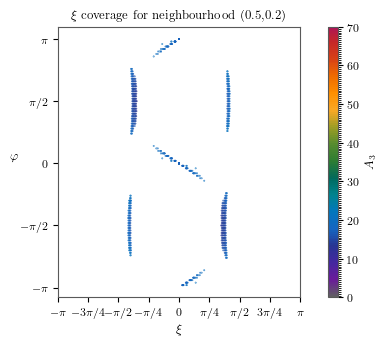

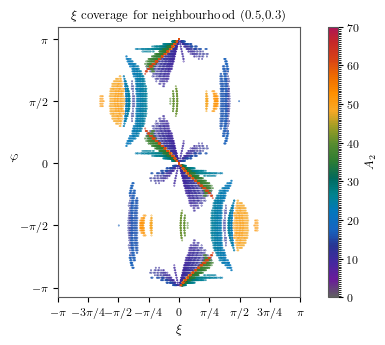

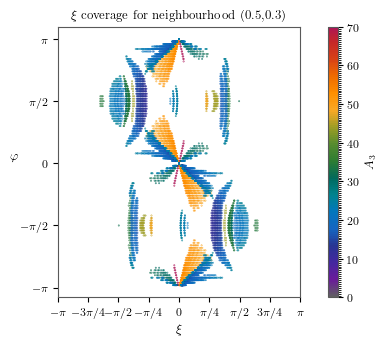

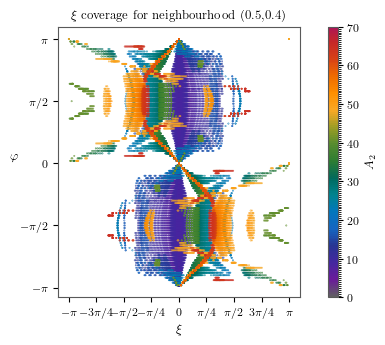

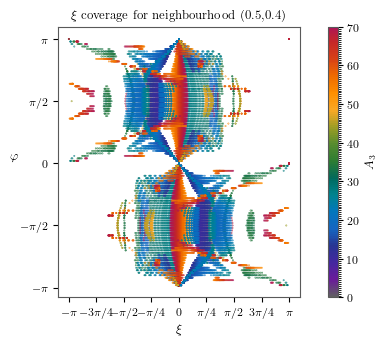

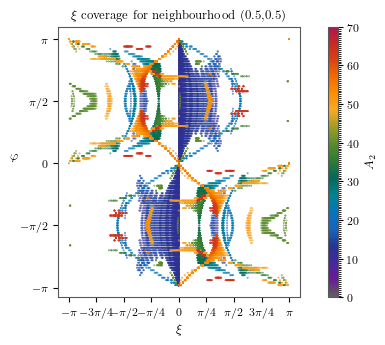

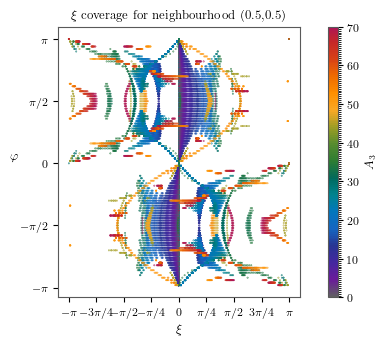

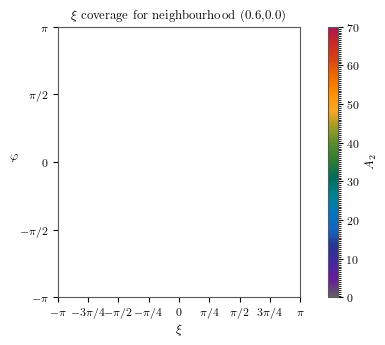

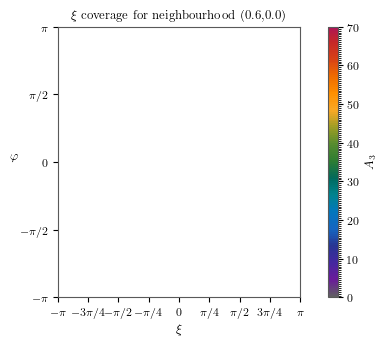

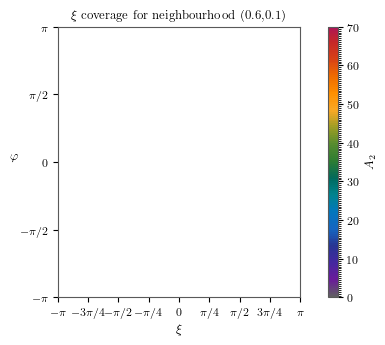

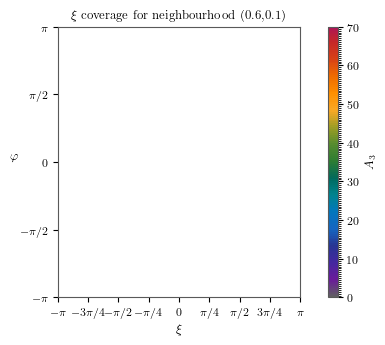

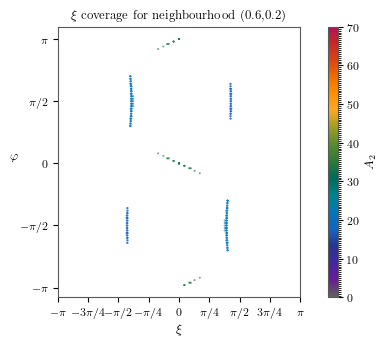

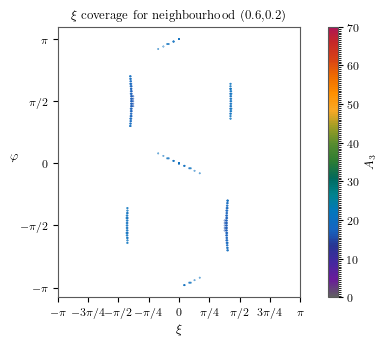

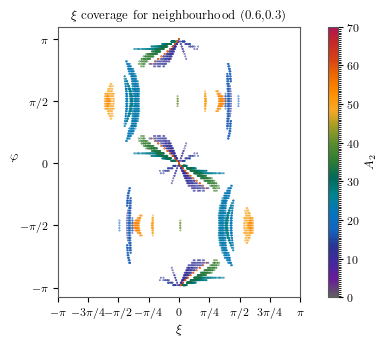

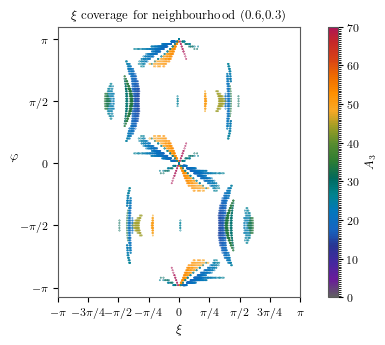

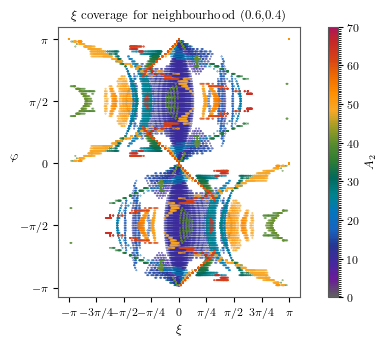

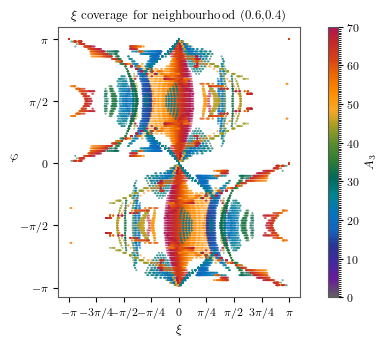

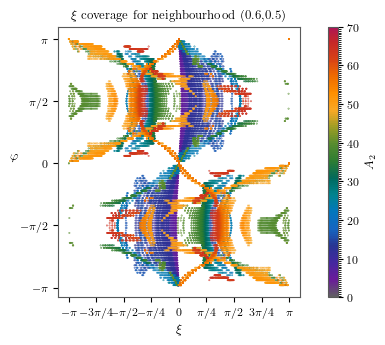

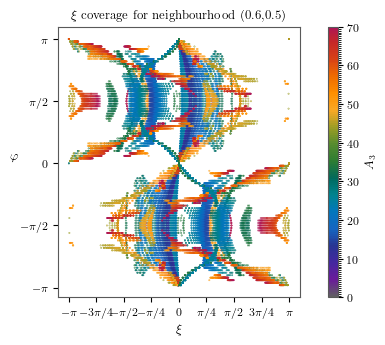

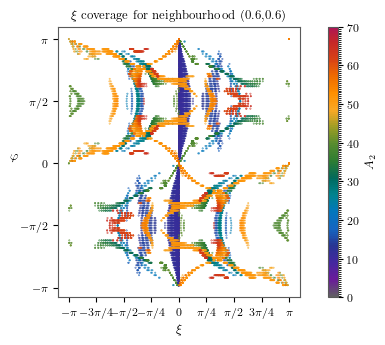

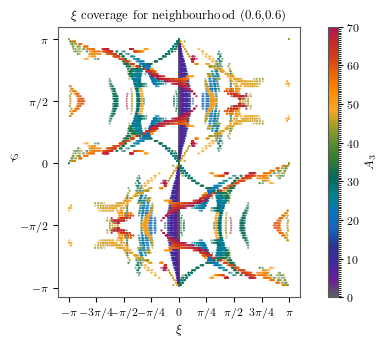

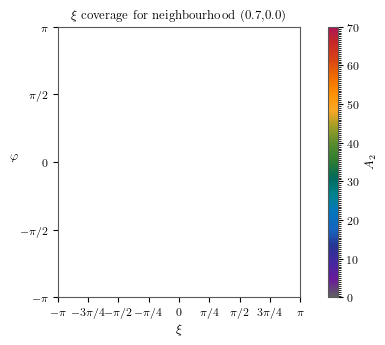

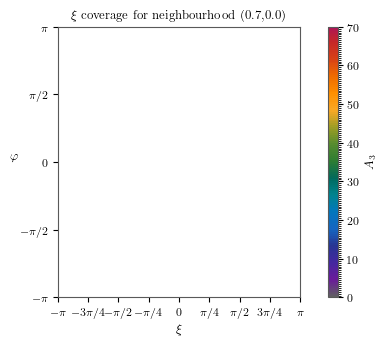

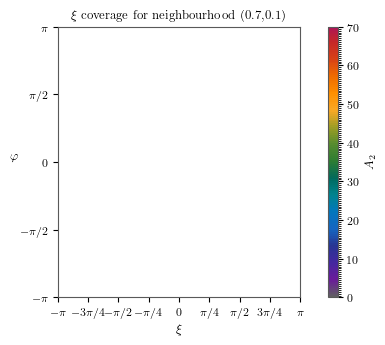

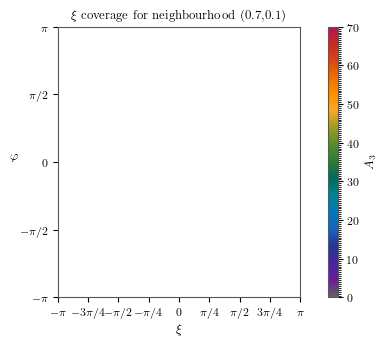

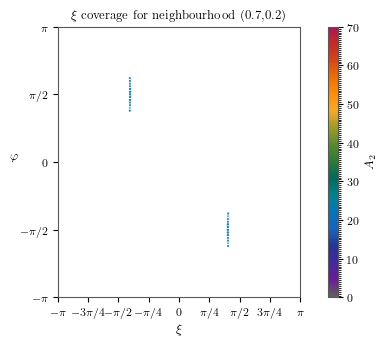

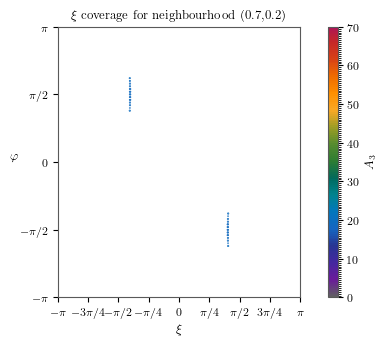

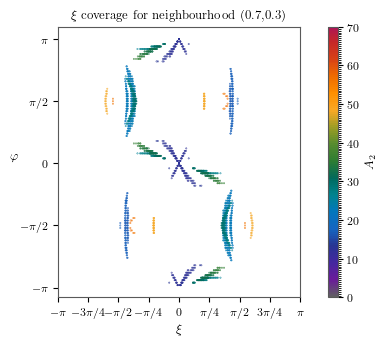

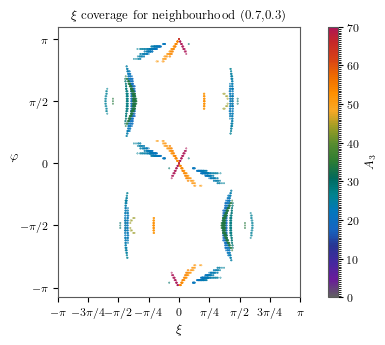

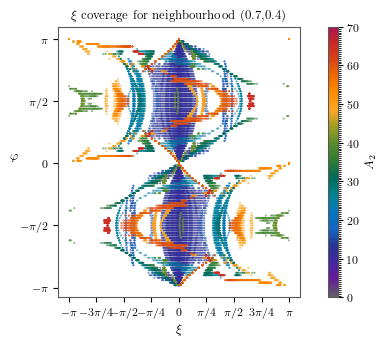

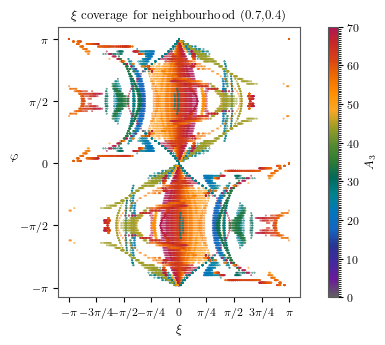

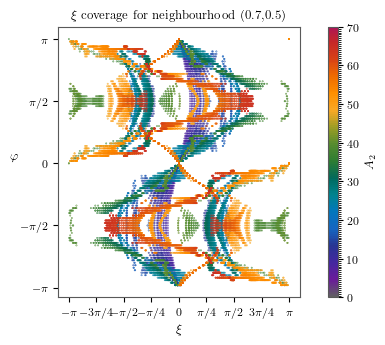

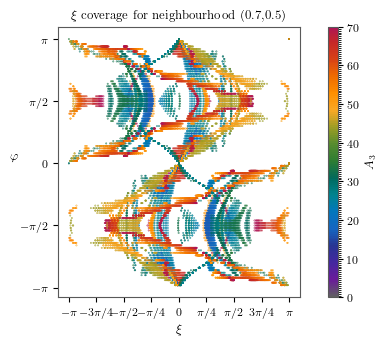

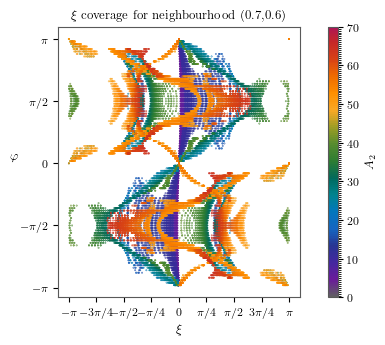

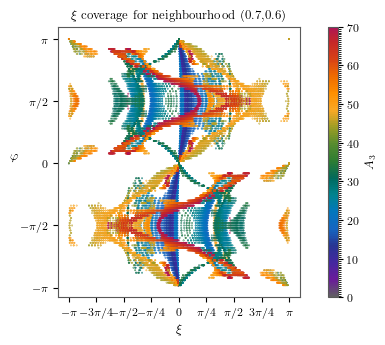

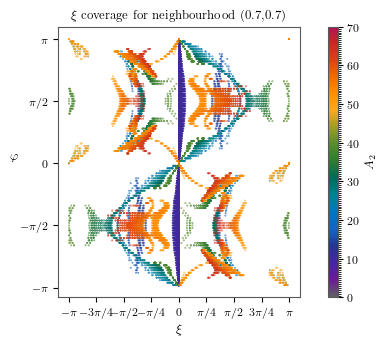

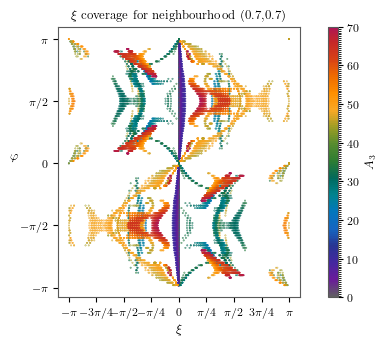

In [4]:
lower_bound = 0.15
radius = 0.05
for r10 in np.linspace(0.3,0.7,5):
    for r20 in np.linspace(0, r10, int(r10*10+1)):
        r10 = np.round(r10, 2)
        r20 = np.round(r20, 2)
        dfP2 = df[((df["FT-LowerT.X"] - r10)**2 + (df["FT-LowerT.Y"] - r20)**2 <= radius**2)
                &(np.abs(df["FT-J12"]) >=lower_bound)
                &(np.abs(df["FT-J23"]) >=lower_bound)
                &(np.abs(df["FT-J31"]) >=lower_bound)
                ]

        dfP2.reset_index(drop=True, inplace=True)

        # lower_bound = 0.2
        # dfP2 = dfP[
        #         (np.abs(dfP["FT-J12"]) >=lower_bound)
        #         &(np.abs(dfP["FT-J23"]) >=lower_bound)
        #         &(np.abs(dfP["FT-J31"]) >=lower_bound)
                #    (dfP.A2 <=50)
                #    &(dfP.A3 <=50)
        # ]

        figsize = (8/2.56, 9/2.56)
        fig, ax = plt.subplots(figsize=figsize)
        # create the new map
        cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
        cmaplist = [cmap(i) for i in range(141)]
        bounds = np.linspace(0, 70, 141)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        tick_label_pos = np.linspace(0,70,8)

        ax.scatter( dfP2["xi"],dfP2.varphi_frac, c=dfP2.A2, s=0.1, cmap=cmap, norm=norm)
        ax.set_xticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
        ax.set_xticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
        ax.set_yticks(np.linspace(-1,1,5))
        # ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
        ax.set_yticklabels([ r"$-\pi$",  r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
        ax.set_ylabel(r"$\varphi$", rotation=0)
        ax.set_xlabel(r"$\xi$", rotation=0)
        ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
        # ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
        # ax.set_title(r"$\xi$ coverage for all data")
        # define the bins and normalize
        # create a second axes for the colorbar
        ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
        tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
        # tick_points = tick_label_pos
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
            spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_2$")
        # plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A2.pdf", format="pdf", bbox_inches="tight")
        plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_exploration"/f"flux_butterfly_alpha,beta={alpha},_x,y={r10},{r20}_colourbar_A2.png", format="png", bbox_inches="tight")

        plt.show()


        figsize = (8/2.56, 9/2.56)
        fig, ax = plt.subplots(figsize=figsize)
        # create the new map
        cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
        cmaplist = [cmap(i) for i in range(141)]
        bounds = np.linspace(0, 70, 141)
        tick_label_pos = np.linspace(0,70,8)

        ax.scatter(dfP2["xi"], dfP2.varphi_frac, c=dfP2.A3, s=0.1, cmap=cmap, norm=norm)
        ax.set_xticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
        ax.set_xticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
        ax.set_yticks(np.linspace(-1,1,5))
        # ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
        ax.set_yticklabels([ r"$-\pi$",  r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
        ax.set_ylabel(r"$\varphi$", rotation=0)
        ax.set_xlabel(r"$\xi$", rotation=0)
        ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
        # ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
        # ax.set_title(r"$\xi$ coverage for all data")
        # define the bins and normalize

        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        # create a second axes for the colorbar
        ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
        tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
        # tick_points = tick_label_pos
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
            spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_3$")
        # plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A3.pdf", format="pdf", bbox_inches="tight")
        plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_exploration"/f"flux_butterfly_alpha,beta={alpha},_x,y={r10},{r20}_colourbar_A3.png", format="png", bbox_inches="tight")

        plt.show()


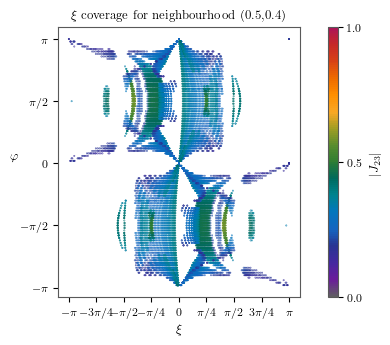

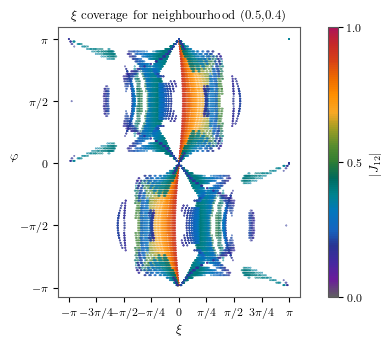

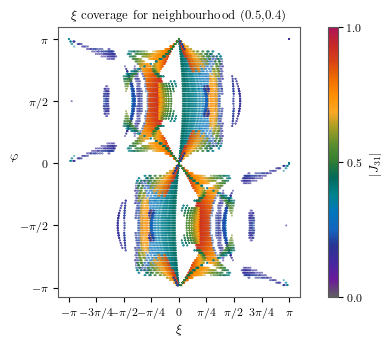

In [5]:
lower_bound = 0.15
r10 = 0.5
r20 = 0.4
dfP2 = df[((df["FT-LowerT.X"] - r10)**2 + (df["FT-LowerT.Y"] - r20)**2 <= radius**2)
                &(np.abs(df["FT-J12"]) >=lower_bound)
                &(np.abs(df["FT-J23"]) >=lower_bound)
                &(np.abs(df["FT-J31"]) >=lower_bound)
                &(df.A2 <=50)
                &(df.A3 <=50)
                ]

figsize = (8/2.56, 9/2.56)
for col_tunnel in ["23", "12", "31"]:
    fig, ax = plt.subplots(figsize=figsize)
    # create the new map
    cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
    cmaplist = [cmap(i) for i in range(141)]
    bounds = np.linspace(0, 1, 141)
    # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    ax.scatter( dfP2["xi"],dfP2.varphi_frac, c=np.abs(dfP2[f"FT-J{col_tunnel}"]), s=0.1, cmap=cmap, norm=norm)
    ax.set_xticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
    ax.set_xticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
    ax.set_yticks(np.linspace(-1,1,5))
    # ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
    ax.set_yticklabels([ r"$-\pi$",  r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
    ax.set_ylabel(r"$\varphi$", rotation=0)
    ax.set_xlabel(r"$\xi$", rotation=0)
    ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
    # ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
    # ax.set_title(r"$\xi$ coverage for all data")
    # define the bins and normalize
    # create a second axes for the colorbar
    ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
        spacing='proportional', boundaries=bounds, format='%3s', label=rf"$|J_{{{col_tunnel}}}|$", ticks = [0,0.5,1])
    # plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A2.pdf", format="pdf", bbox_inches="tight")
    plt.show()


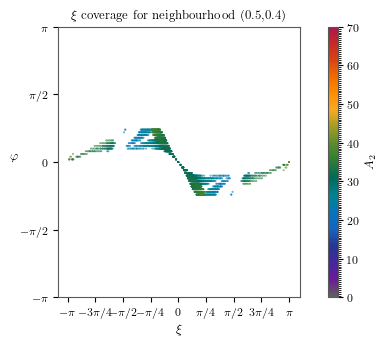

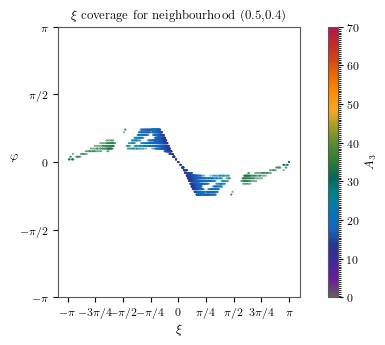

In [17]:
lower_bound = 0.15
radius = 0.05

r10 = 0.5
r20 = 0.4

dfP2 = df[((df["FT-LowerT.X"] - r10)**2 + (df["FT-LowerT.Y"] - r20)**2 <= radius**2)
                &(np.abs(df["FT-J12"]) >=lower_bound)
                &(np.abs(df["FT-J23"]) >=lower_bound)
                &(np.abs(df["FT-J31"]) >=lower_bound)
                &(df.A2 <=46)
                &(df.A3 <=43)
                &(df.A2 >20)
                &(df.varphi_frac <= 1/4)
                &(df.varphi_frac >= -1/4)
                ]

dfP2.reset_index(drop=True, inplace=True)


figsize = (8/2.56, 9/2.56)
fig, ax = plt.subplots(figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
tick_label_pos = np.linspace(0,70,8)

ax.scatter( dfP2["xi"],dfP2.varphi_frac, c=dfP2.A2, s=0.1, cmap=cmap, norm=norm)
ax.set_xticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_xticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_yticks(np.linspace(-1,1,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_yticklabels([ r"$-\pi$",  r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_ylabel(r"$\varphi$", rotation=0)
ax.set_xlabel(r"$\xi$", rotation=0)
ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize
# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_2$")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A2.pdf", format="pdf", bbox_inches="tight")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_exploration"/f"flux_butterfly_alpha,beta={alpha},_x,y={r10},{r20}_colourbar_A2.png", format="png", bbox_inches="tight")

plt.show()


figsize = (8/2.56, 9/2.56)
fig, ax = plt.subplots(figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
tick_label_pos = np.linspace(0,70,8)

ax.scatter(dfP2["xi"], dfP2.varphi_frac, c=dfP2.A3, s=0.1, cmap=cmap, norm=norm)
ax.set_xticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_xticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_yticks(np.linspace(-1,1,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_yticklabels([ r"$-\pi$",  r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_ylabel(r"$\varphi$", rotation=0)
ax.set_xlabel(r"$\xi$", rotation=0)
ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_3$")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A3.pdf", format="pdf", bbox_inches="tight")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_exploration"/f"flux_butterfly_alpha,beta={alpha},_x,y={r10},{r20}_colourbar_A3.png", format="png", bbox_inches="tight")

plt.show()


## Reversed axes

In [ ]:
figsize = (8/2.56, 9/2.56)
fig, ax = plt.subplots(figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
tick_label_pos = np.linspace(0,70,8)

ax.scatter(dfP["phi3/pi"], dfP["xi"], c=dfP.A2, s=0.1, cmap=cmap, norm=norm)
ax.set_yticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_yticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,2,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\xi$", rotation=0)
ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize


# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_2$")
plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A2.pdf", format="pdf", bbox_inches="tight")

plt.show()


figsize = (8/2.56, 9/2.56)
fig, ax = plt.subplots(figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
tick_label_pos = np.linspace(0,70,8)

ax.scatter(dfP["phi3/pi"], dfP["xi"], c=dfP.A3, s=0.1, cmap=cmap, norm=norm)
ax.set_yticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_yticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,2,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([ r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\xi$", rotation=0)
ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_3$")
plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A3.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [37]:
dfPP = dfP[(dfP.A3 < 37)
           &(dfP.A3 > 15)
           &(dfP.A2 >15)
           &(dfP.A2 <45)
        #    &(dfP.xi > pi/4 -0.05)
        #    &(dfP.xi < pi/4 + 0.05)
           ]

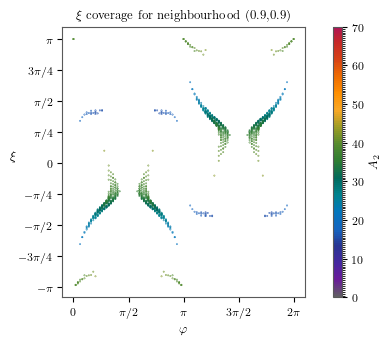

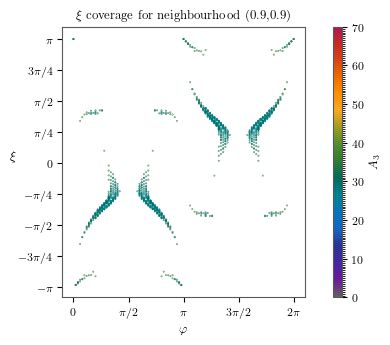

In [38]:
figsize = (8/2.56, 9/2.56)
fig, ax = plt.subplots(figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
tick_label_pos = np.linspace(0,70,8)

ax.scatter(dfPP["phi3/pi"], dfPP["xi"], c=dfPP.A2, s=0.1, cmap=cmap, norm=norm)
ax.set_yticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_yticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,2,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\xi$", rotation=0)
ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize


# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_2$")
plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A2.pdf", format="pdf", bbox_inches="tight")

plt.show()


figsize = (8/2.56, 9/2.56)
fig, ax = plt.subplots(figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
tick_label_pos = np.linspace(0,70,8)

ax.scatter(dfPP["phi3/pi"], dfPP["xi"], c=dfPP.A3, s=0.1, cmap=cmap, norm=norm)
ax.set_yticks([-pi, -3*pi/4, -pi/2, -pi/4 , 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_yticklabels([ r"$-\pi$", r"$-3\pi/4$",r"$-\pi/2$",r"$-\pi/4$",0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,2,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([ r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\xi$", rotation=0)
ax.set_title(fr"$\xi$ coverage for neighbourhood ({r10},{r20})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_3$")
plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_nh=({r10},{r20})_colourbar_A3.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [21]:
dfPPP = dfPP[(dfPP.xi > 3*pi/4)]

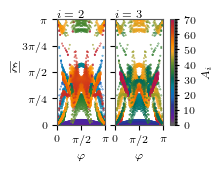

In [45]:
PlotParams(fontsize=8.5)
figsize = (3.5/2.56, 3.5/2.56)
text_y = 3.2
fig, ax = plt.subplots(1,2, figsize=figsize)
# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
tick_label_pos = np.linspace(0,70,8)
plt.text(-1.21, text_y, r"$i=2$")

ax[0].scatter(dfP["phi3/pi"], np.abs(dfP["xi"]), c=dfP.A2, s=0.1, cmap=cmap, norm=norm)
ax[0].set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
ax[0].set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax[0].set_xticks(np.linspace(0,1,3))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax[0].set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax[0].set_xlim([0,1])
ax[0].set_xlabel(r"$\varphi$")
ax[0].set_ylabel(r"$|\xi|$", rotation=0)
ax[0].set_ylim([0,pi])
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize


# create a second axes for the colorbar
# ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
# tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# # tick_points = tick_label_pos
# cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
#     spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_3$")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_discretepoints_absxi_nh=({sqCentreX},{sqCentreY})_colourbar_A2.pdf", format="pdf", bbox_inches="tight")

plt.text(0, text_y, r"$i=3$")
ax[1].scatter(dfP["phi3/pi"], np.abs(dfP["xi"]), c=dfP.A3, s=0.1, cmap=cmap, norm=norm)
ax[1].set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
ax[1].set_yticklabels(["", r"", r"" , r"",  r""])
ax[1].set_xticks(np.linspace(0,1,3))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax[1].set_xticklabels([ r"$0$", r"$\pi/2$", r"$\pi$"])
ax[1].set_xlabel(r"$\varphi$")
# fig.suptitle(fr"$\xi$ coverage for neighbourhood ({sqCentreX},{sqCentreY})")
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,pi])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_i$")
plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/f"flux_continuity_discretepoints_absxi_nh=({sqCentreX},{sqCentreY})_mixed.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [12]:
13/16

0.8125

## Connect lines

In [ ]:
# get lines that connect neighbouring phi
last_phi3 = dfP.iloc[0]["phi3/pi"] #set first phi3 val

phi3_biglist = [[last_phi3]]
xi_biglist=[[dfP.iloc[0]["xi"]]]
a3_biglist = [dfP.iloc[0]["A3"]]
a2_biglist = [dfP.iloc[0]["A2"]]
# last_sign = np.sign(dfP.iloc[0]["xi"])
lst_num=0
for _, row in dfP[1:].iterrows():
    xi = np.real(row["xi"])
    phi3= np.real(row["phi3/pi"])
    a2 = np.real(row.A2)
    a3 = np.real(row.A3)
    
    if np.round(phi3,2)==np.round(last_phi3+0.02, 2):

        xi_biglist[lst_num].append(xi)
        phi3_biglist[lst_num].append(phi3)

    else:
        xi_biglist.append([np.real(xi)])
        phi3_biglist.append([phi3])
        a2_biglist.append(a2)
        a3_biglist.append(a3)
        lst_num+=1
    
    last_phi3= phi3

# for some reason these are complex, set them to be real
for i in range(len(xi_biglist)):
    xi_biglist[i][0]=np.real(xi_biglist[i][0])
    a2_biglist[i]=np.real(a2_biglist[i])
    a3_biglist[i]=np.real(a3_biglist[i])
    phi3_biglist[i][0]=np.real(phi3_biglist[i][0])


In [ ]:
figsize = (8/2.56, 9/2.56)


# create the new map
cmap = LinearSegmentedColormap.from_list('custom cmap', ["#616161",  "#6A1B9A", "#4527A0", "#283593","#1565C0", "#0277BD", "#00838F", "#00695C", "#2E7D32", "#558B2F", "#9E9D24" , "#F9A825", "#FF8F00", "#EF6C00", "#D84315", '#C62828', "#AD1457"], N=141)
cmaplist = [cmap(i) for i in range(141)]
bounds = np.linspace(0, 70, 141)
tick_label_pos = np.linspace(0,70,8)


fig, ax = plt.subplots(figsize=figsize)
for i in range(len(xi_biglist)):
    if len(phi3_biglist[i])==1:
        ax.scatter(phi3_biglist[i], np.abs(xi_biglist[i]),   s=0.1, c=cmaplist[int(a2_biglist[i]*2)])
    else:
        ax.plot(phi3_biglist[i], np.abs(xi_biglist[i]),  c=cmaplist[int(a2_biglist[i]*2)])
ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,2,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$|\xi|$", rotation=0)
ax.set_title(rf"$\xi$ coverage for neighbourhood $({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*8, jn_zeros(0,3)[1]*8,  jn_zeros(0,3)[2]*8]))))
# tick_points = tick_label_pos

cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_2$")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
plt.show()


fig, ax = plt.subplots(figsize=figsize)

for i in range(len(xi_biglist)):
    if len(phi3_biglist[i])==1:
        ax.scatter(phi3_biglist[i], np.abs(xi_biglist[i]),   s=0.1, c=cmaplist[int(a3_biglist[i]*2)])
    else:
        ax.plot(phi3_biglist[i], np.abs(xi_biglist[i]),  c=cmaplist[int(a3_biglist[i]*2)])
ax.set_yticks([0, pi/4, pi/2, 3*pi/4, pi])
ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,2,5))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$|\xi|$", rotation=0)
# ax.set_title(r"$\xi$ coverage for neighbourhood ("+str(sqCentreX)+","+str(sqCentreY)+")")
# ax.set_title(r"$\xi$ coverage for all data")
# define the bins and normalize
ax.set_title(rf"$\xi$ coverage for neighbourhood $({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create a second axes for the colorbar
ax2 = fig.add_axes([0.99, 0.11, 0.03, 0.77])
tick_points = np.sort(np.concatenate((tick_label_pos,np.array([jn_zeros(0,3)[0]*16, jn_zeros(0,3)[1]*16]))))
# tick_points = tick_label_pos
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=tick_label_pos, boundaries=bounds, format='%1i', label=r"$A_3$")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}_colourbar_A3.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1000
#             )
plt.show()